# Advertising Sales Channel Prediction

Problem Statement:
    
    When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


In [4]:
# Importing required Library's

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the data set
df= pd.DataFrame(pd.read_csv("Advertising.csv"))
df.head()
# The raw data downloaded was having an 'unnamed column' so inserted the name 'Index' in the raw data file 

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Droping the column Index which is not required at all 
df= df.drop(columns='Index', axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# Driving teh information about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

According to the above two analysis, all the values present in the data are of numerical type and there are no missing values in teh data set

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


from above analysis it is seen that there is a huge difference between the 75% value and max in the variable 'news paper'
hence there might be some outliers for this boxplot is being used.

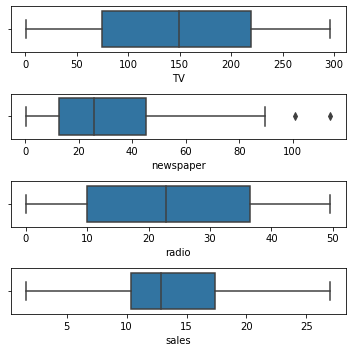

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt4 = sns.boxplot(df['sales'],ax=axs[3])
plt.tight_layout()

from the above boxplots it is clearly seen that there are outliers in variable 'newspaper'

In [11]:
df.shape

(200, 4)

Removing the outliers from the data set.

In [12]:
from scipy import stats
df_outlier=df.copy()
z=np.abs(stats.zscore(df_outlier))
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [13]:
df_outlier = df_outlier[(z<3).all(axis=1)]

In [14]:
df_outlier.shape

(198, 4)

only two rows are reduced hence there will be no impact on the analysis.

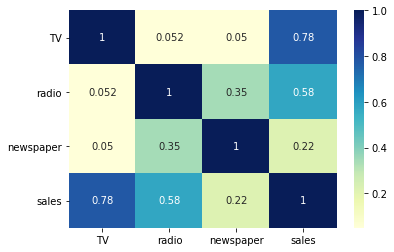

In [15]:
# Finding out the relation of independent variables(newspaper, radio, TV) and the dependent variable(sales).
sns.heatmap(df_outlier.corr(), cmap="YlGnBu", annot = True)
plt.show()

the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

In [16]:
# Seperatingthe training and test data set.
x = df_outlier['TV']
y = df_outlier['sales']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state =42)

As we are using only one variable in the model building because it is he only variable with with good correlation coeficient values as visible through heatmap, hence we will be using Simple Linear Regression

In [18]:
# using Simple Linear Regression for the model
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    7.166933
TV       0.046108
dtype: float64

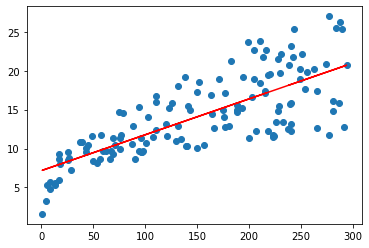

In [19]:
# Using the above value of constant and the coefficient to draw the regression equation and the regression line.
plt.scatter(x_train, y_train)
plt.plot(x_train, 7.166933 + 0.046108*x_train, 'r')
plt.show()

In [20]:
# Testing the data on the test data set
x_test_sm =sm.add_constant(x_test)

y_pred = lr.predict(x_test_sm)

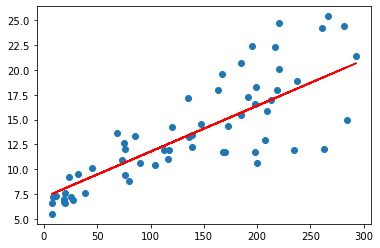

In [21]:
# fitting the model.
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.166933 + 0.046108 * x_test, 'r')
plt.show()

In [31]:
#Saving the Model

import joblib

#save the model as pickle in file

joblib.dump(lr,'Advertising_Sales_Channel_Prediction.pkl')

['Advertising_Sales_Channel_Prediction.pkl']